<a href="https://colab.research.google.com/github/ssk2001/AI-Tech-Lab-Experiments/blob/main/AITA_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

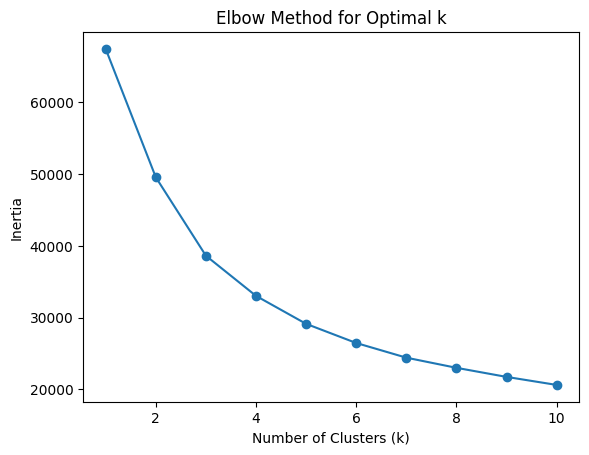

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               age  potential       pace    passing
cluster                                            
0        23.198740  78.316538  73.977607  64.984605
1        21.254393  69.829259  65.102941  47.697097
2        28.260887  68.707515  72.880899  61.651205
3        30.372345  66.798001  51.277801  54.446064


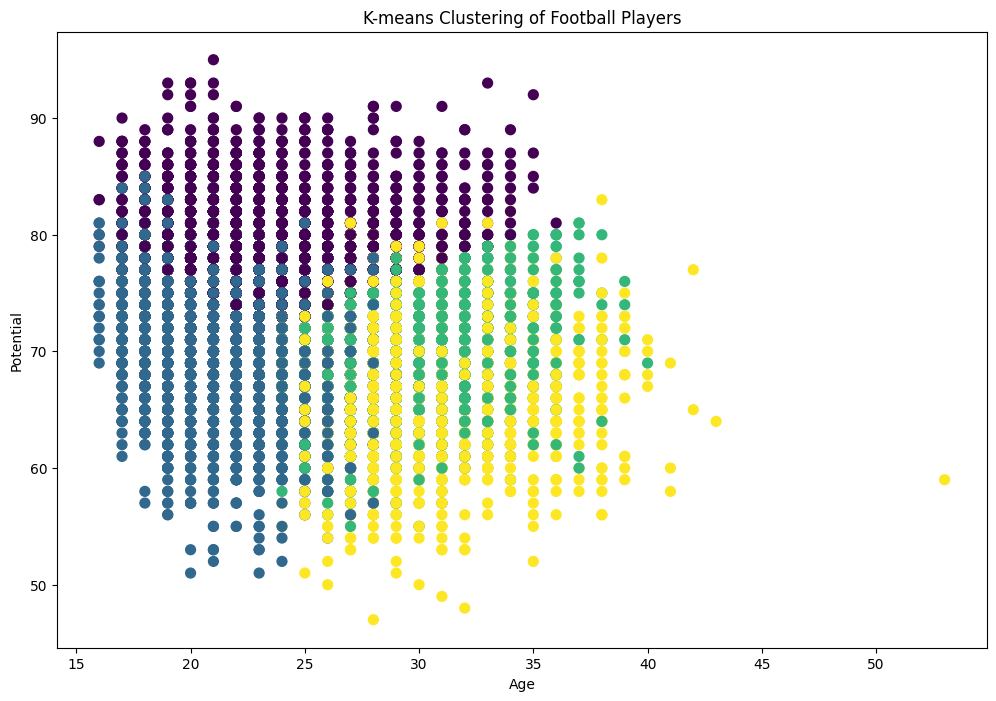

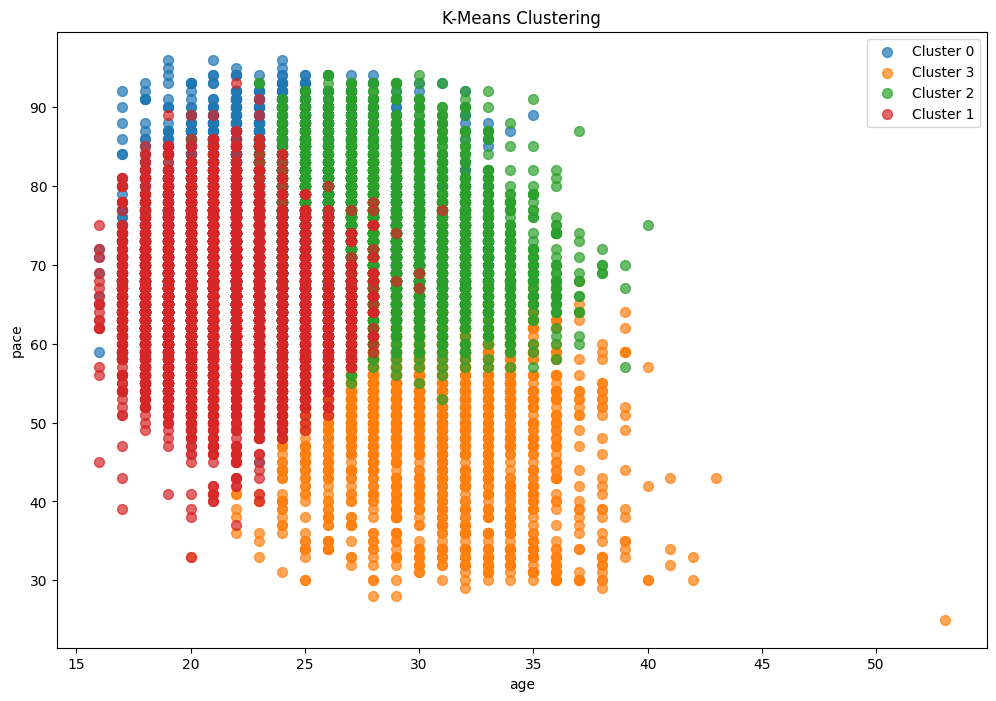

In [13]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the actual file name
data = pd.read_csv('FIFA21.csv')

# Select relevant attributes for clustering
# Replace 'attribute1', 'attribute2', etc. with actual column names
X = data[['age', 'potential', 'pace', 'passing']]

# Handle missing values (NaN) by dropping rows with NaN
X = X.dropna()

# Scale the data after handling missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (using Elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
optimal_k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# Create a new DataFrame with the selected columns and cluster labels
clustered_data = X.copy()
clustered_data['cluster'] = kmeans.fit_predict(X_scaled)


# Analyze the clusters
print(clustered_data.groupby('cluster').mean())

# Visualize the clusters (if you have 2 attributes) - Choose appropriate columns
plt.figure(figsize=(12, 8))  # Increase figure size
plt.scatter(clustered_data['age'], clustered_data['potential'], c=clustered_data['cluster'], cmap='viridis', s=50)  # Increase marker size
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('K-means Clustering of Football Players')
plt.show()



# Select features for visualization (choose two for a scatter plot) - Choose appropriate columns
x_feature = 'age'
y_feature = 'pace'

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Increase figure size
for cluster in clustered_data['cluster'].unique():
  cluster_data = clustered_data[clustered_data['cluster'] == cluster]
  plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster}', s=50, alpha=0.7)  # Increase marker size and add transparency

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('K-Means Clustering')
plt.legend()
plt.show()


